In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
product_launch_df = pd.read_csv("Product Launch Dataset.csv",encoding='latin-1')
positioning_category_df = pd.read_csv("Positioning Category Mapping Dataset.csv",encoding='latin-1')
flavor_classification_df = pd.read_csv("Flavor Classification Dataset.csv",encoding='latin-1')

In [6]:
product_launch_df.head() 

,market_subcategory,id,eventdate,country,positioning,region,flavor
0,Other Soft Drinks,1,01-01-2005,Netherlands,"Low Calorie, Natural",West Europe,"Herbs, not specified; Fruit, not specified"
1,Carbonates,2,01-01-2005,Ireland,Convenience - Consumption,West Europe,"Fruit, not specified"
2,Juice & Juice Drinks,3,01-01-2005,Ireland,"100% Not from Concentrate, Convenience - Consu...",West Europe,Lemon; Honey; Ginger
3,Juice & Juice Drinks,4,01-01-2005,Ireland,"100% Not from Concentrate, Convenience - Consu...",West Europe,Mango; Passion Fruit
4,Juice & Juice Drinks,5,01-01-2005,Ireland,"100% Not from Concentrate, Convenience - Consu...",West Europe,Mango


In [4]:
product_launch_df.shape

(114689, 7)

In [5]:
positioning_category_df.head() 

,Positioning Group,Positioning Subcategory
0,Age,Children (5-12 years)
1,Age,Seniors (55+)
2,Others,Economy
3,Choice,Halal
4,Choice,Kosher


In [6]:
positioning_category_df.shape

(114, 2)

In [7]:
flavor_classification_df.head() 

,Flavor_Group,flavor
0,Alcohol,"Vodka, Citron"
1,Alcohol,Bacardi
2,Alcohol,"Bacardi, Gold"
3,Alcohol,"Bacardi, Silver"
4,Alcohol,"Beer, Ale"


In [8]:
flavor_classification_df.shape 

(1445, 2)

In [9]:
product_launch_df.dtypes 

market_subcategory    object
id                     int64
eventdate             object
country               object
positioning           object
region                object
flavor                object
dtype: object

In [10]:
product_launch_df['eventdate'] = pd.to_datetime(product_launch_df['eventdate']) 

In [11]:
product_launch_df.dtypes 

market_subcategory            object
id                             int64
eventdate             datetime64[ns]
country                       object
positioning                   object
region                        object
flavor                        object
dtype: object

In [12]:
product_launch_df.nunique() 

market_subcategory        14
id                    114689
eventdate                139
country                  109
positioning            21576
region                     8
flavor                 18974
dtype: int64

In [13]:
product_launch_df.isnull().sum() 

market_subcategory       0
id                       0
eventdate                0
country                  0
positioning           4312
region                   0
flavor                1976
dtype: int64

### 1.Data Exploration: Data Handling and Formatting

### Create a list of unique flavors based on your analysis. What is the total number of unique flavors in your list?

In [14]:
df1 = product_launch_df['flavor'].astype(str).str.replace(", ","- ") #making flavours column easy to read

In [15]:
df1.dropna() 

0         Herbs- not specified; Fruit- not specified
1                               Fruit- not specified
2                               Lemon; Honey; Ginger
3                               Mango; Passion Fruit
4                                              Mango
                             ...                    
114684                              Berry- Wildberry
114685                      Raspberry- Not Specified
114686                                    Tea- White
114687             Tea- Green; Citrus- Not Specified
114688                         Cherry- Not Specified
Name: flavor, Length: 114689, dtype: object

In [16]:
df2 = df1.str.replace("\|\| ","; ")
df3 = df2.str.split(";") 
df3

0         [Herbs- not specified,  Fruit- not specified]
1                                [Fruit- not specified]
2                              [Lemon,  Honey,  Ginger]
3                               [Mango,  Passion Fruit]
4                                               [Mango]
                              ...                      
114684                               [Berry- Wildberry]
114685                       [Raspberry- Not Specified]
114686                                     [Tea- White]
114687             [Tea- Green,  Citrus- Not Specified]
114688                          [Cherry- Not Specified]
Name: flavor, Length: 114689, dtype: object

In [17]:
import itertools

flavors = list(set(itertools.chain.from_iterable(df3.values))) 

['',
 'Chocolate Fudge',
 ' Sesame',
 'Cabbage- not specified',
 'Pitanga',
 ' Chocolate- belgian',
 'Cumin',
 ' Garlic- not specified',
 ' Berry- Red',
 'Nectarine',
 ' Superfruit- jackfruit',
 'Kefir',
 'Bayberry',
 'Berry- mixed',
 ' Grains- rye',
 ' Gourd- white',
 ' Sage',
 'Medlar',
 ' Coffee- robusta',
 'Superfruit- yumberry',
 ' Tea- Green',
 'Cocktail- Bloody Mary',
 ' Cream- whipped',
 'Lemongrass',
 'Herbs- not specified',
 ' Grains- Granola',
 'Cranberry ',
 ' Brandy',
 ' Berry- lingon',
 'Eggplant',
 ' Milk- Condensed',
 ' Tabasco',
 ' Cookie Dough',
 ' Bean- Green',
 'Nata De Coco',
 'Grains- rye',
 ' Coffee- latte',
 'Cream Soda',
 'Olive- Not specified',
 'Chocolate- Not Specified',
 ' Raspberry- Red',
 ' Watercress',
 'Ginseng- Not Specified',
 ' Grains- Amaranth',
 'Gourd- bitter',
 'Honey Fungus',
 'Beer- Black',
 'Hogplum',
 'Mushroom- not specified',
 ' Grape- muscat',
 ' Vanilla- bourbon',
 'Coffee- Java',
 ' Mabolo',
 'Boysenberry',
 'Mango',
 ' Parsnip',
 ' Herb

In [18]:
len(flavors) #total no of unique flavors

1736

### Plot histogram of market subcategory against eventdate (years). Do any categories show negative trend over years?

In [19]:
product_launch_df['year'] = product_launch_df['eventdate'].dt.year #extract year from the eventdate

In [20]:
#calculation of total count of every market subcategory for all years
val = product_launch_df.groupby(["market_subcategory"])["year"].value_counts().to_frame(name = "count").reset_index()
val

,market_subcategory,year,count
0,Bottled Water - Flavoured,2013,982
1,Bottled Water - Flavoured,2014,923
2,Bottled Water - Flavoured,2012,698
3,Bottled Water - Flavoured,2011,685
4,Bottled Water - Flavoured,2009,677
...,...,...,...
109,Sports Powders,2007,13
110,Sports Powders,2008,11
111,Sports Powders,2009,8
112,Sports Powders,2006,6


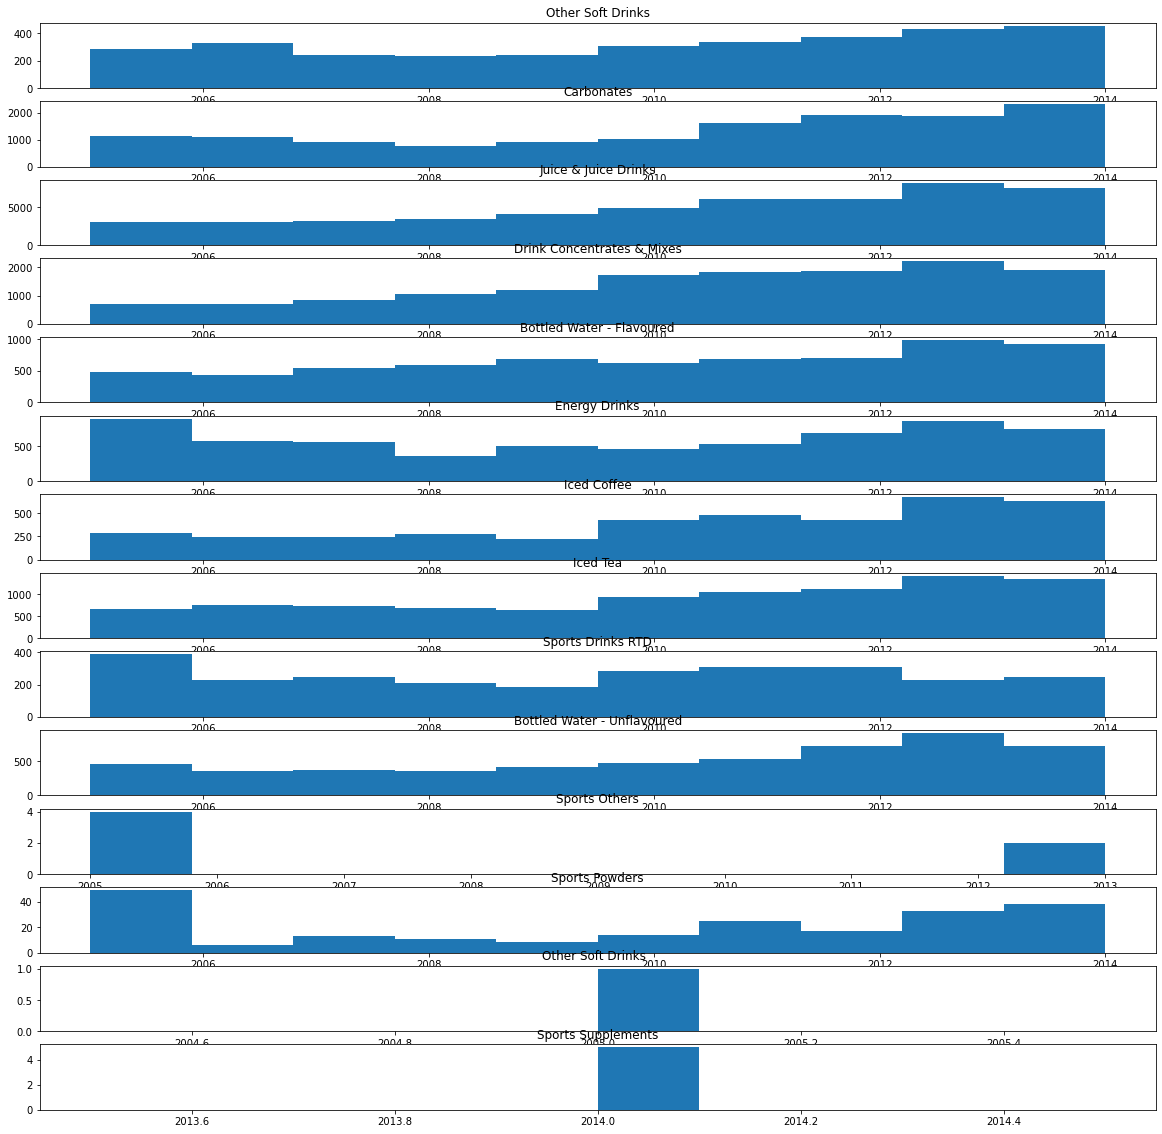

In [21]:
#display count of each subcategory over the years
groups = product_launch_df['market_subcategory'].unique()
fig,ax = plt.subplots(len(groups),figsize=(20,20))
i=0
for group in groups:
    ax[i].set_title(group)
    ax[i].hist(product_launch_df[product_launch_df['market_subcategory'] == group]['year'])
    i=i+1

### The following market subcategories show negative trend over these mentioned years - 

#### other softdrinks  : 2007 to 2009
#### Carbonates        : 2005 to 2009
#### Energy drinks     : 2006 to 2009
#### Energy drinks     : 2006 to 2009
#### Iced-tea          : 2006 to 2009
#### Sports drinks RTD : 2007 to 2009
#### Sports powder     : 2007 to 2009

### Which market subcategory has highest unique flavors?

In [22]:
#calculation of total count of every market subcategory for all flavors
flv = product_launch_df.groupby(['market_subcategory'])['flavor'].value_counts().to_frame(name="count").reset_index()
flv

,market_subcategory,flavor,count
0,Bottled Water - Flavoured,Lemon,589
1,Bottled Water - Flavoured,Strawberry,206
2,Bottled Water - Flavoured,"Orange, not specified",197
3,Bottled Water - Flavoured,Peach,188
4,Bottled Water - Flavoured,Lemon-Lime,186
...,...,...,...
23539,Sports Supplements,"Coffee, Espresso",1
23540,Sports Supplements,Lemon,1
23541,Sports Supplements,Lemon-Lime,1
23542,Sports Supplements,"Orange, Not Specified",1


In [23]:
#market subcategory having highest unique flavors
flv.groupby(['market_subcategory'])['flavor'].nunique().to_frame(name = "sum").sort_values(by="sum",ascending=False).reset_index().head(1)

,market_subcategory,sum
0,Juice & Juice Drinks,9479


### Juice & Juice Drinks market subcategory has highest unique flavors

# 2.Data Exploration: Merging and Manipulating Datasets

### Could you use this Flavor Group data together with the Product Launch data and reveal some insights on the number of product launches over different quarters for “fruit” Flavor?

In [24]:
#extracting along with quarter from eventdate
product_launch_df['quarter'] = pd.PeriodIndex(product_launch_df['eventdate'],freq='Q').astype('string')

In [25]:
#sorting quarter with unique values
unq = sorted(product_launch_df['quarter'].unique())

In [26]:
#get unique flavour groups
flavour_grp = list(flavor_classification_df['Flavor_Group'].unique())

In [27]:
#prepare flavour group dictionary
flavour_grp_dict = {}
def common_member(a,b):
    a_set = set(a)
    b_set = set(b)
    if len(a_set.intersection(b_set)) > 0:
        return(True)
    return(False)

for i in flavour_grp:
    flvr = list(flavor_classification_df[flavor_classification_df['Flavor_Group']==i]['flavor'])
    qrtr_dict = {}
    for j in unq:
        qrtr_flvr = list(product_launch_df[product_launch_df['quarter']==j]['flavor'].dropna().apply(lambda x : x.split('; ')))
        count=0
        for k in qrtr_flvr:
            if common_member(flvr,k):
                count=count+1
        qrtr_dict[j] = count
    flavour_grp_dict[i] = qrtr_dict    

In [28]:
print("Number of product launches over different quarters for fruit flavor :")
flavour_grp_dict['Fruit']

Number of product launches over different quarters for fruit flavor :


{'2005Q1': 2896,
 '2005Q2': 8,
 '2005Q3': 4,
 '2005Q4': 2,
 '2006Q1': 2781,
 '2007Q1': 3010,
 '2008Q1': 3453,
 '2009Q1': 3906,
 '2010Q1': 4686,
 '2010Q2': 2,
 '2010Q3': 6,
 '2011Q1': 5877,
 '2012Q1': 9610,
 '2013Q1': 12587,
 '2013Q3': 0,
 '2013Q4': 2,
 '2014Q1': 10521}

# 3.Data Formatting, Merging and Manipulating Datasets

### Could you use this Positioning Group data together with the Product Launch data and reveal some insights on the distribution for “Convenience” & “Ethical Positioning” Groups?

In [29]:
upg = positioning_category_df['Positioning Group'].unique()
upg_dict = dict()
for i in upg:
    upg_dict[i] = list(positioning_category_df[positioning_category_df['Positioning Group'] == i]['Positioning Subcategory'])
upg_dict

{'Age': ['Children (5-12 years)',
  'Seniors (55+)',
  'Baby Formula (0-6 months)',
  'Baby Formula (6-12 months)',
  'Growing-Up Milk (1+ year)',
  'Pregnancy/Breastfeeding - Formulas'],
 'Others': ['Economy',
  'Microwaveable',
  'Refill',
  'Single Shot',
  'Soy Foods',
  'Dry',
  'Sticks'],
 'Choice': ['Halal', 'Kosher', 'Vegetarian', 'GMO Free'],
 'Co-Branding': ['Co-Branding'],
 'Supplements': ['Anti-Cancer',
  'Blood Pressure',
  'Bone Health (Supplements)',
  'Brain-Mood Health',
  'Children',
  'Diabetes',
  'Digestive/Liver Health',
  'Energy and Stamina',
  'Eye Health (Supplements)',
  'Health/Wellness',
  'Heart Health (Supplements)',
  'Immune Health (Supplements)',
  'Insomnia',
  'Joint Health (Supplements)',
  'Kidney/Bladder Health',
  'Lung Health',
  "Men's Health",
  'Mental Acuity',
  'Oral Health (Supplements)',
  'Sexual Health',
  'Weight Management (Supplements)',
  "Women's Health",
  'Skin Health (Supplements)',
  'Pregnancy/Breastfeeding - Formulas'],
 'Gen

In [30]:
from collections import Counter
lst = list(product_launch_df['positioning'].dropna().apply(lambda x : x.split(',')))
pg = [val.strip() for sublist in lst for val in sublist]
pg_dict = Counter(pg)
pg_dict

Counter({'Low Calorie': 10555,
         'Natural': 12602,
         'Convenience - Consumption': 58086,
         '100% Not from Concentrate': 3142,
         'No Added Sugar': 10327,
         'No Additives/Preservatives': 23477,
         'Nectars (25-99% juice)': 11061,
         'Vitamin/Mineral Fortified': 6663,
         'Digestive/Gut Health': 1765,
         'High/Source of Fibre': 2114,
         'Dry': 7582,
         'Low Fat': 3331,
         'Low Sodium': 2702,
         'Low Carb': 1476,
         'Antioxidant': 5569,
         'Immune Health': 1711,
         'Convenience - Packaging': 9948,
         'Low Sugar': 2337,
         'Female': 336,
         'Sugar Free': 6041,
         'Anti-Aging/Aging-Well': 250,
         'Skin Health': 1074,
         'Energy/Alertness': 8667,
         'Convenience - Easy-to-Prepare': 11226,
         'Heart Health': 1149,
         'Juice Drinks (up to 25% juice)': 16637,
         'Vegetarian': 4692,
         'Convenience - Time Saving': 839,
         'Econ

In [31]:
product_pg = {}
for i in upg:
    product_pg[i] = {}
    for j in upg_dict[i]:
        product_pg[i][j] = pg_dict[j]
product_pg

{'Age': {'Children (5-12 years)': 4311,
  'Seniors (55+)': 12,
  'Baby Formula (0-6 months)': 0,
  'Baby Formula (6-12 months)': 0,
  'Growing-Up Milk (1+ year)': 1,
  'Pregnancy/Breastfeeding - Formulas': 0},
 'Others': {'Economy': 2124,
  'Microwaveable': 48,
  'Refill': 26,
  'Single Shot': 728,
  'Soy Foods': 114,
  'Dry': 7582,
  'Sticks': 676},
 'Choice': {'Halal': 4691,
  'Kosher': 5195,
  'Vegetarian': 4692,
  'GMO Free': 1970},
 'Co-Branding': {'Co-Branding': 417},
 'Supplements': {'Anti-Cancer': 0,
  'Blood Pressure': 0,
  'Bone Health (Supplements)': 0,
  'Brain-Mood Health': 0,
  'Children': 0,
  'Diabetes': 0,
  'Digestive/Liver Health': 0,
  'Energy and Stamina': 0,
  'Eye Health (Supplements)': 0,
  'Health/Wellness': 0,
  'Heart Health (Supplements)': 0,
  'Immune Health (Supplements)': 1,
  'Insomnia': 0,
  'Joint Health (Supplements)': 0,
  'Kidney/Bladder Health': 0,
  'Lung Health': 0,
  "Men's Health": 0,
  'Mental Acuity': 0,
  'Oral Health (Supplements)': 0,
  'S

Text(0.5, 1.0, 'Distribution for Convenience')

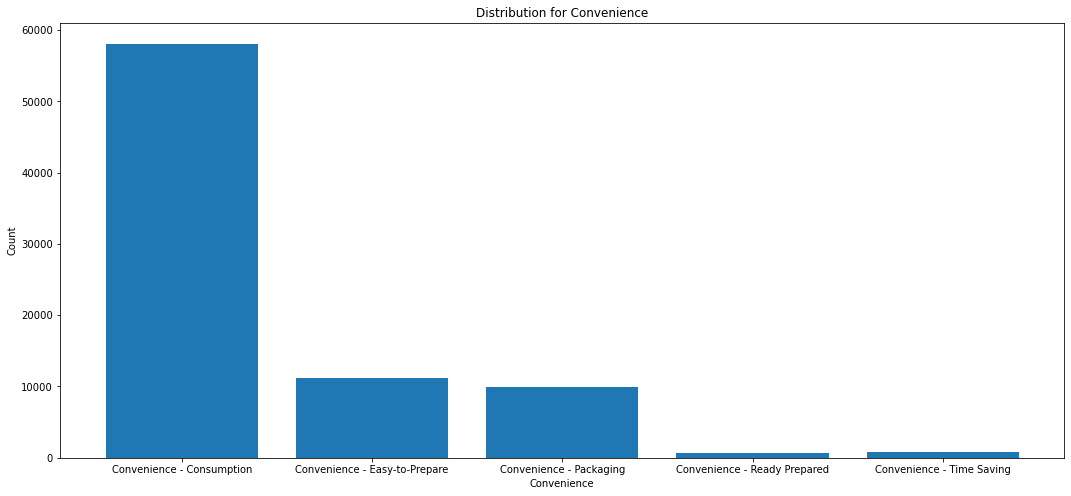

In [32]:
con = product_pg["Convenience"]
keys = con.keys()
values = con.values()
plt.figure(figsize=(18,8))
plt.bar(keys,values)
plt.xlabel("Convenience")
plt.ylabel("Count")
plt.title("Distribution for Convenience")

Convenience-consumption has higher count

Text(0.5, 1.0, 'Distribution for Ethical')

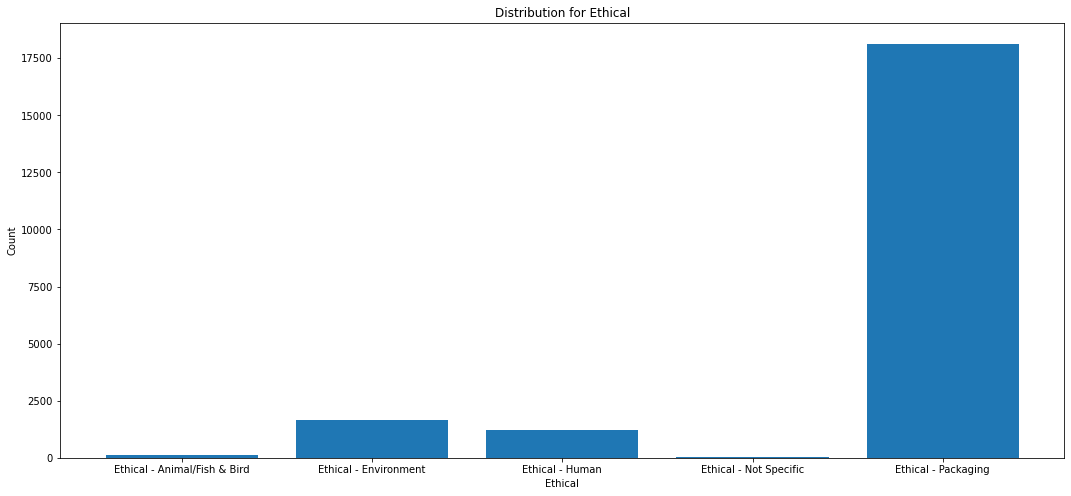

In [33]:
eth = product_pg["Ethical"]
keys = eth.keys()
values = eth.values()
plt.figure(figsize=(18,8))
plt.bar(keys,values)
plt.xlabel("Ethical")
plt.ylabel("Count")
plt.title("Distribution for Ethical")

Ethical packaging has higer count

# 5.Data Exploration: Filtering and Subsetting 

### One of your clients is interested in having the data from the Canadian market for the year 2013 about Energy drinks with ethical packaging. Help extract this data for that client.

In [34]:
product_launch_df['market_subcategory'].unique()

array(['Other Soft Drinks', 'Carbonates', 'Juice & Juice Drinks',
       'Drink Concentrates & Mixes', 'Bottled Water - Flavoured',
       'Energy Drinks', 'Iced Coffee', 'Iced Tea', 'Sports Drinks RTD',
       'Bottled Water - Unflavoured', 'Sports Others', 'Sports Powders',
       'Other Soft Drinks  ', 'Sports Supplements'], dtype=object)

In [35]:
product_launch_df['positioning'].unique()

array(['Low Calorie, Natural', 'Convenience - Consumption',
       '100% Not from Concentrate, Convenience - Consumption, Natural',
       ..., 'Indulgent and Premium, Heart Health, Kosher',
       'Low Calorie, Ethical - Packaging, Convenience - Consumption, GMO Free',
       'Kosher, Juice Drinks (up to 25% juice), Allergy, Gluten Free, Organic, Omega-3, GMO Free'],
      dtype=object)

In [36]:
#code to extract the required result
rs = product_launch_df[(product_launch_df['positioning'].str.contains("Ethical - Packaging")) & (product_launch_df['year'] == 2013) & (product_launch_df['market_subcategory'] == "Energy Drinks") & (product_launch_df['country'] == "Canada")]
rs

,market_subcategory,id,eventdate,country,positioning,region,flavor,year,quarter
82404,Energy Drinks,82405,2013-01-11,Canada,"Organic, Energy/Alertness, Ethical - Human, Et...",North America,"Berry, Not specified; Tea, Green; Tea, Mate",2013,2013Q1
82405,Energy Drinks,82406,2013-01-11,Canada,"Brain Health, Energy/Alertness, Ethical - Pack...",North America,"Citrus, Not Specified",2013,2013Q1
82439,Energy Drinks,82440,2013-01-11,Canada,"Brain Health, Energy/Alertness, Ethical - Pack...",North America,"Cherry, Not Specified",2013,2013Q1
82440,Energy Drinks,82441,2013-01-11,Canada,"Brain Health, Energy/Alertness, Ethical - Pack...",North America,"Berry, Mixed",2013,2013Q1


### Identify TOP 5 unique flavors across countries in 2013?

In [37]:
unique_country = product_launch_df[product_launch_df['year'] == 2013]['country'].unique()

In [38]:
country_dict = dict()
for i in unique_country:
    flvr_count = dict(Counter(product_launch_df[(product_launch_df['country'] == i) & (product_launch_df['year'] == 2013)]['flavor'].dropna()))
    sort_flvr_count = {key: value for key, value in sorted(flvr_count.items(),key=lambda item : item[1],reverse=True)[:5]}
    country_dict[i] = sort_flvr_count 

In [39]:
print("Top 5 unique flavors across countries in 2013 :")
for i in country_dict:
    print(i)
    print(country_dict[i])

Top 5 unique flavors across countries in 2013 :
Netherlands
{'Unflavored': 33, 'Orange, Not specified': 32, 'Cola': 31, 'Fruit, Not specified': 15, 'Apple, Red': 13}
Israel
{'Apple, Red': 2, 'Banana; Passion Fruit; Coconut': 2, 'Mandarin': 2, 'Banana; Date': 2, 'Plum; Peach; Nectarine': 1}
Sweden
{'Orange, Not specified': 12, 'Strawberry': 4, 'Orange, Blood': 2, 'Grapefruit, Red': 2, 'Berry, Blueberry': 2}
Jordan
{'Orange, Not specified': 4, 'Apple, Red': 3, 'Guava': 3, 'Superfruit, Pomegranate': 2, 'Mango': 2}
Greece
{'Orange, Not specified': 12, 'Apple, Red': 6, 'Pineapple': 6, 'Lemon': 4, 'Cherry, Sour': 3}
Ireland
{'Orange, Not specified': 3, 'Lime': 3, 'Fruit, Not specified': 2, 'Kiwi; Lime': 2, 'Blackcurrant': 2}
Turkey
{'Unflavored': 8, 'Apple, Red': 7, 'Tea, Not specified; Lemon': 6, 'Peach': 5, 'Cola': 5}
Norway
{'Apple, Red': 5, 'Orange, Not specified': 4, 'Unflavored': 4, 'Lemonade': 3, 'Tea, Not specified; Peach': 1}
Costa Rica
{'Orange, Not specified': 4, 'Aloe Vera; Honey

# 6.TOP 5 Positioning Groups

### The client is interested in determining TOP 5 popular positioning categories (groups) across countries in 2013. Define the Top 5 based on total product launches. 

In [40]:
year_df = product_launch_df[product_launch_df["year"] == 2013] #subsetting dataframe where year = 2013
year_df

,market_subcategory,id,eventdate,country,positioning,region,flavor,year,quarter
28736,Carbonates,28737,2013-10-01,Netherlands,"Traditional, Convenience - Consumption, Ethica...",West Europe,Cola,2013,2013Q4
28737,Carbonates,28738,2013-10-01,Netherlands,"Traditional, Low Calorie, Convenience - Consum...",West Europe,Cola,2013,2013Q4
28738,Carbonates,28739,2013-10-01,Netherlands,"Traditional, Convenience - Consumption",West Europe,Cola,2013,2013Q4
28741,Juice & Juice Drinks,28742,2013-01-01,Netherlands,"Nectars (25-99% juice), Low Calorie, Low Sugar...",West Europe,"Apple, Red",2013,2013Q1
28754,Juice & Juice Drinks,28755,2013-01-01,Netherlands,"Nectars (25-99% juice), Low Calorie, Low Sugar...",West Europe,"Orange, Not specified",2013,2013Q1
...,...,...,...,...,...,...,...,...,...
114567,Juice & Juice Drinks,114568,2013-01-02,Singapore,"No Additives/Preservatives, Convenience - Cons...",Asia,"Blackcurrant; Berry, Blueberry",2013,2013Q1
114568,Juice & Juice Drinks,114569,2013-01-03,Singapore,"No Additives/Preservatives, Convenience - Cons...",Asia,Blackcurrant,2013,2013Q1
114569,Juice & Juice Drinks,114570,2013-01-04,Singapore,"No Additives/Preservatives, Convenience - Cons...",Asia,Blackcurrant; Strawberry,2013,2013Q1
114613,Carbonates,114614,2013-01-09,Singapore,"No Additives/Preservatives, Immune Health, Wei...",Asia,"Vinegar, Not Specified; Honey",2013,2013Q1


In [41]:
#determining TOP 5 popular positioning categories across countries in 2013
container = {}
year_df['positioning'] = year_df['positioning'].astype(str).str.split(",")
for x in unique_country:
    var1 = list(itertools.chain.from_iterable(year_df[year_df['country'] == x]['positioning']))
    var2 = list(filter(None,var1))
    var3 = Counter(var2)
    container[x] = var3.most_common(5)

pd.Series(container)

Netherlands    [( Convenience - Consumption, 177), ( Ethical ...
Israel         [( Kosher, 28), ( No Additives/Preservatives, ...
Sweden         [( Convenience - Consumption, 32), ( Ethical -...
Jordan         [( No Additives/Preservatives, 19), ( Convenie...
Greece         [( Ethical - Packaging, 51), ( No Additives/Pr...
                                     ...                        
New Zealand    [( Convenience - Consumption, 41), ( No Additi...
Hong Kong      [( Ethical - Packaging, 11), ( No Additives/Pr...
Bahrain        [( Ethical - Packaging, 24), ( No Additives/Pr...
Lebanon        [( Natural, 4), ( No Additives/Preservatives, ...
Ecuador        [( Ethical - Packaging, 10), ( Convenience - P...
Length: 89, dtype: object